In [9]:
% pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('planets.csv')
exodf = df.loc[(df['st_mass'] <= .6) & (df['st_teff']<=6000)]

In [3]:
ra = exodf['ra']
dec = exodf['dec']
distance = exodf['st_dist']
stellar_mass = exodf['st_mass']
teff = exodf['st_teff']

In [4]:
x = distance * np.cos(dec) *np.cos(ra)
y = distance * np.cos(dec) *np.sin(ra) 
z = distance * np.sin(dec)

In [5]:
a = -1000
b = 1000
c = -1000
d = 1000
e = -1000
f = 1000

In [6]:
#def init():
   ## ax.scatter(x, y, z, c = teff, cmap= 'plasma', s = 5*((10*stellar_mass)**2), marker = '*', xlim = (a,b), ylim = (c,d), zlim = (e,f))
    #ax.set_axis_off()
    #return fig,

In [7]:
#def animate (i):
  #  ax.view_init(elev=10., azim = i)
   # return fig,

<IPython.core.display.Javascript object>


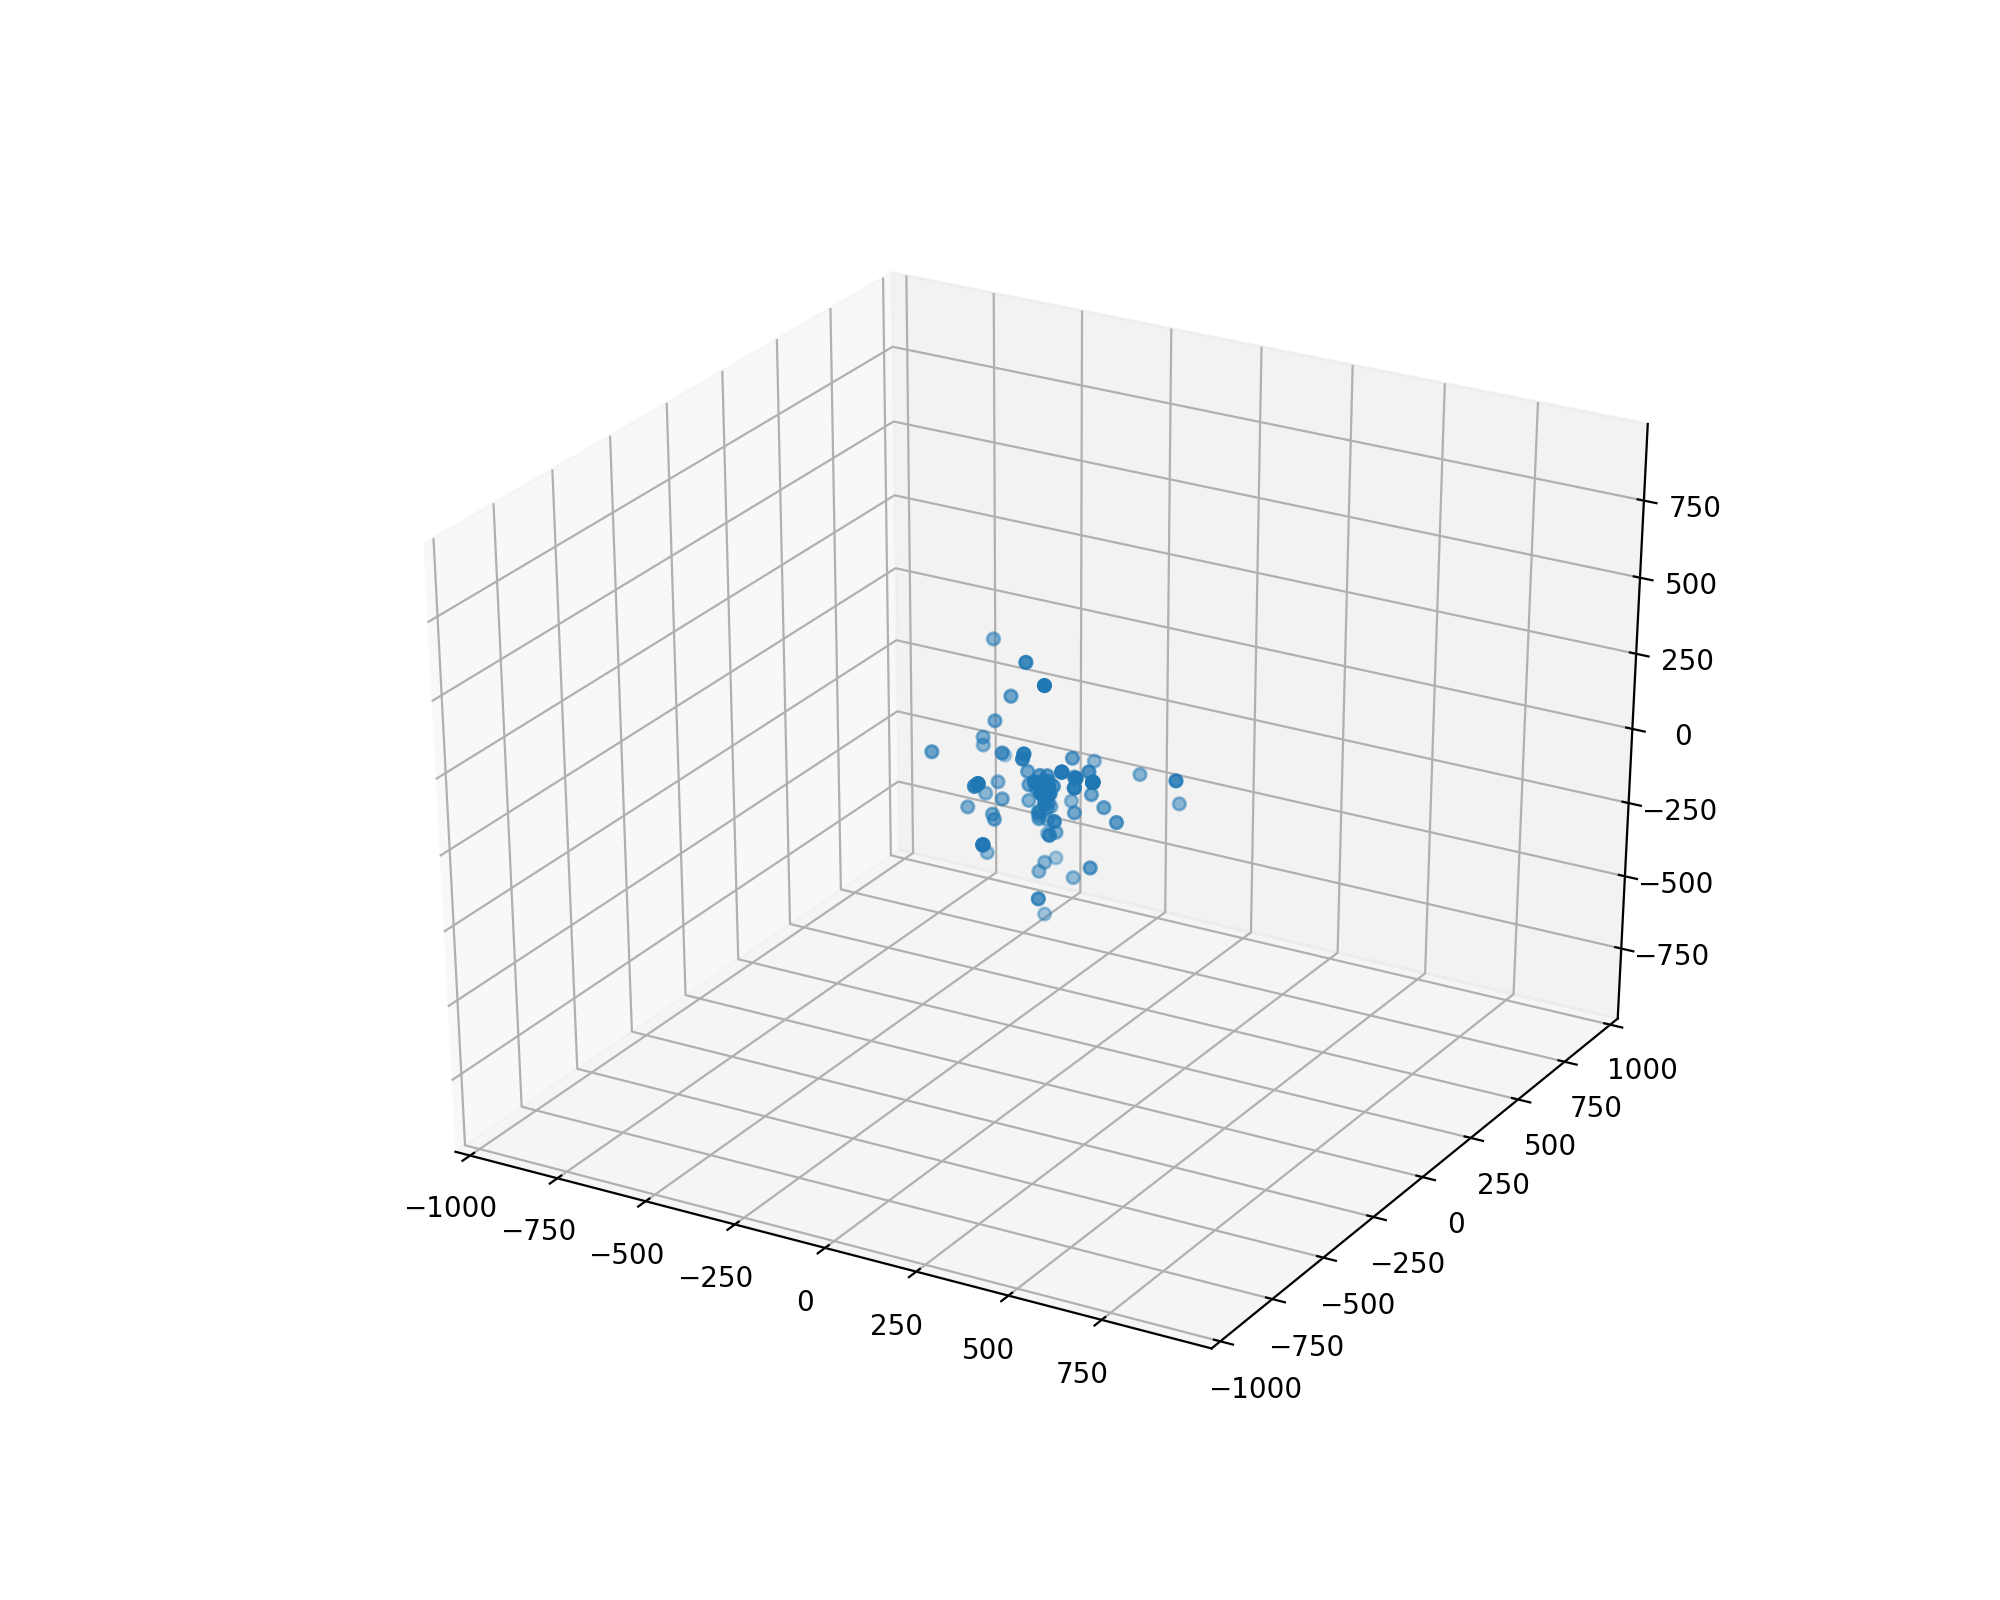

In [8]:
fig = plt.figure(figsize=[10, 8]) 
ax = fig.add_subplot(111, projection = "3d", xlim = (a,b), ylim = (c,d), zlim = (e,f))
#anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 360, interval =5, blit = True)
#anim.save('exoplanet_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

#panning
def on_key_press_left(event): #creates our event handling function to move left on the x-axis by subtracting 5
    if event.key == 'left': #if the key pressed is the left arrow
        global a #tells our function that we defined 'a' outside of the function
        global b #^
        a = a-0.5 #subtracts 5 from the value of a each time the key is pressed
        b = b-0.5 #^
        ax.set_xlim([a,b]) #resets the x-axis limits to new 'a' and 'b'
        plt.show() #re-shows the plot so we can see the change in axis

fig.canvas.mpl_connect('key_press_event', on_key_press_left) 
#connects our figure with our above function; tells the figure that it should expect a key_press

def on_key_press_right(event): #creates our event handling function to move right on the x-axis by adding 5
    if event.key == 'right': #if the key pressed is the right arrow
        global a #tells our function that we defined 'a' outside of the function
        global b #^
        a = a+0.5 #adds 5 from the value of a each time the key is pressed
        b = b+0.5 #^
        ax.set_xlim([a,b]) #resets the x-axis limits to new 'a' and 'b'
        plt.show() #re-shows the plot so we can see the change in axis

fig.canvas.mpl_connect('key_press_event', on_key_press_right) 
#connects our figure with our above function; tells the figure that it should expect a key_press

def on_key_press_down(event): #creates our event handling function to move out on the y-axis by subtracting 5
    if event.key == 'down': #if the key pressed is the down arrow
        global c #tells our function that we defined 'c' outside of the function
        global d #^
        c = c-0.5 #subtracts 5 from the value of a each time the key is pressed
        d = d-0.5 #^
        ax.set_ylim([c,d]) #resets the y-axis limits to new 'c' and 'd'
        plt.show() #re-shows the plot so we can see the change in axis

fig.canvas.mpl_connect('key_press_event', on_key_press_down) 
#connects our figure with our above function; tells the figure that it should expect a key_press

def on_key_press_up(event): #creates our event handling function to move in on the y-axis by adding 5
    if event.key == 'up': #if the key pressed is the up arrow
        global c #tells our function that we defined 'c' outside of the function
        global d #^
        c = c+0.5 #adds 5 from the value of a each time the key is pressed
        d = d+0.5 #^
        ax.set_ylim([c,d]) #resets the y-axis limits to new 'c' and 'd'
        plt.show() #re-shows the plot so we can see the change in axis

fig.canvas.mpl_connect('key_press_event', on_key_press_up) 
#connects our figure with our above function; tells the figure that it should expect a key_press

def on_key_press_zminus(event): #creates our event handling function to move in on the z-axis by adding 5
    if event.key == 'r': #if the key pressed is the up arrow
        global e #tells our function that we defined 'c' outside of the function
        global f #^
        e = e-0.5 #adds 5 from the value of a each time the key is pressed
        f = f-0.5 #^
        ax.set_zlim([e,f]) #resets the y-axis limits to new 'c' and 'd'
        plt.show() #re-shows the plot so we can see the change in axis

fig.canvas.mpl_connect('key_press_event', on_key_press_zminus) 
#connects our figure with our above function; tells the figure that it should expect a key_press

def on_key_press_zplus(event): #creates our event handling function to move up on the y-axis by adding 5
    if event.key == 't': #if the key pressed is the up arrow
        global e #tells our function that we defined 'c' outside of the function
        global f #^
        e = e+0.5 #adds 5 from the value of a each time the key is pressed
        f = f+0.5 #^
        ax.set_zlim([e,f]) #resets the y-axis limits to new 'c' and 'd'
        plt.show() #re-shows the plot so we can see the change in axis

fig.canvas.mpl_connect('key_press_event', on_key_press_zplus) 
#connects our figure with our above function; tells the figure that it should expect a key_press


def zoom_factory(ax,base_scale = 2.):
    def zoom_fun(event):
        # get the current x and y limits
        cur_xlim = ax.get_xlim()
        cur_ylim = ax.get_ylim()
        cur_zlim = ax.get_zlim()
        
        x_left = xdata - cur_xlim[0]
        x_right = cur_xlim[1] - xdata
        y_top = ydata - cur_ylim[0]
        y_bottom = cur_ylim[1] - ydata
        z_top = zdata - cur_zlim[0]
        z_bottom = cur_zlim[1] - zdata
        
        xdata = event.xdata # get event x location
        ydata = event.ydata # get event y location
        zdata = event.zdata # get event z location
        
        if event.button == 'up':
            # deal with zoom in
            scale_factor = 1/base_scale
        elif event.button == 'down':
            # deal with zoom out
            scale_factor = base_scale
        else:
            # deal with something that should never happen
            scale_factor = 1
            print (event.button)
        
        # set new limits
        ax.set_xlim([xdata - x_left*scale_factor,
                    xdata + x_right*scale_factor])
        ax.set_ylim([ydata - y_top*scale_factor,
                    ydata + y_bottom*scale_factor])
        ax.set_zlim([zdata - z_left*scale_factor,
                    zdata + z_right*scale_factor])

        plt.draw() # force re-draw

    fig = ax.get_figure() # get the figure of interest
    # attach the call back
    fig.canvas.mpl_connect('scroll_event',zoom_fun)

    #return the function
    return zoom_fun


ax.scatter(x, y, z )
           #c = teff, cmap= 'plasma', s = 5*((10*stellar_mass)**2), marker = '*',
scale = 1.5
f = zoom_factory(ax,base_scale = scale)


